## Image maniupulation with Python

A digital image is a finite collection of small, discrete picture elements called pixels. These pixels are organized in a two-dimensional grid. Each pixel represents the smallest amount of picture information that is available. Sometimes these pixels appear as small “dots”.

Each image (grid of pixels) has its own width and its own height. The width is the number of columns and the height is the number of rows. We can name the pixels in the grid by using the column number and row number. However, it is very important to remember that computer scientists like to start counting with 0! This means that if there are 20 rows, they will be named 0,1,2, and so on through 19. This will be very useful later when we iterate using range.

In the figure below, the pixel of interest is found at column c and row r.


![Image Pixels](image_pixels.png)

## The RGB Color Model

Each pixel of the image will represent a single color. The specific color depends on a formula that mixes various amounts of three basic colors: red, green, and blue. This is called the RGB color model.

The minimum intensity value for a basic color is 0. For example if the red intensity is 0, then there is no red in the pixel. The maximum intensity is 255. This means that there are actually 256 different amounts of intensity for each basic color. Since there are three basic colors, that means that you can create 2563 distinct colors using the RGB Color Model.

| Color       | Red         | Green       | Blue        |
| ----------- | ----------- | ----------- | ----------- |
| Red         | 255         | 0           | 0           |
| Green       | 0           | 255         | 0           |
| Blue        | 0           | 0           | 255         |
| White       | 255         | 255         | 255         |
| Black       | 0           | 0           | 0           |
| Yellow      | 255         | 255         | 0           |
| Magenta     | 255         | 0           | 255         |

The ```PIL``` library ("Python imaging library", also called ```pillow```) will be used to display and change the properties of individual pixels in images.

In [20]:
!pip install pillow

You should consider upgrading via the '/Users/ekaterinaossetchkina/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


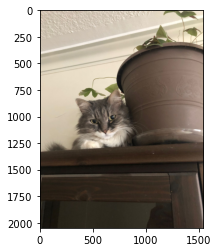

In [46]:
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open("Tisha.jpeg")

plt.imshow(im)

In [47]:
# to get indivisual pixel values, returns a tuple as RGB
# get the value of pixel in top left corner
im.getpixel((0,0))

(191, 176, 155)

In [48]:
#make a copy of im, will play around with this image
output_image = im

## Exercise: Print out Pixel Values every 100 Pixels Downwards

In [71]:
for x in range(output_image.width):
        for y in range(output_image.height):
            if y % 100 == 0:
                print(im.getpixel((x,y)))
           
            #if float(np.random.rand(1))<threshold:
              #  output_image.putpixel( (x,y), tuple(np.random.choice(range(255), 3, replace=True)) )
                

(191, 176, 155)
(222, 206, 190)
(197, 184, 168)
(207, 196, 178)
(237, 233, 221)
(187, 179, 160)
(224, 213, 191)
(228, 213, 192)
(225, 210, 189)
(221, 206, 185)
(217, 201, 176)
(206, 191, 170)
(202, 190, 168)
(189, 177, 155)
(48, 38, 28)
(19, 18, 13)
(41, 37, 26)
(33, 26, 16)
(103, 94, 85)
(64, 61, 30)
(34, 29, 25)
(193, 178, 157)
(218, 202, 186)
(200, 187, 171)
(207, 196, 178)
(238, 234, 222)
(187, 179, 160)
(223, 212, 190)
(228, 213, 192)
(226, 211, 190)
(221, 206, 185)
(217, 201, 176)
(206, 191, 170)
(202, 190, 168)
(189, 177, 155)
(47, 37, 27)
(23, 22, 17)
(42, 35, 25)
(34, 27, 17)
(97, 88, 79)
(86, 83, 52)
(31, 26, 22)
(196, 181, 160)
(214, 198, 182)
(201, 188, 172)
(206, 195, 177)
(239, 235, 223)
(187, 179, 160)
(222, 211, 189)
(228, 213, 192)
(226, 211, 190)
(221, 206, 185)
(217, 201, 176)
(206, 191, 170)
(202, 190, 168)
(189, 177, 155)
(46, 36, 26)
(24, 23, 18)
(45, 39, 27)
(35, 28, 18)
(74, 67, 57)
(94, 90, 61)
(35, 30, 26)
(199, 184, 163)
(210, 194, 178)
(199, 186, 170)
(205, 

(32, 28, 17)
(28, 25, 20)
(19, 18, 13)
(25, 22, 17)
(240, 224, 208)
(192, 184, 165)
(210, 202, 181)
(206, 194, 178)
(189, 178, 156)
(202, 191, 173)
(197, 185, 163)
(228, 216, 194)
(227, 212, 191)
(218, 206, 184)
(214, 200, 174)
(207, 192, 171)
(201, 186, 165)
(108, 102, 80)
(47, 37, 27)
(22, 21, 16)
(42, 35, 25)
(34, 27, 17)
(26, 23, 18)
(18, 17, 12)
(21, 18, 13)
(237, 221, 205)
(193, 185, 166)
(213, 205, 184)
(206, 194, 178)
(186, 175, 153)
(203, 192, 174)
(197, 185, 163)
(228, 216, 194)
(227, 212, 191)
(218, 206, 184)
(214, 200, 174)
(207, 192, 171)
(201, 186, 165)
(108, 100, 79)
(47, 37, 27)
(23, 22, 17)
(42, 35, 25)
(35, 28, 18)
(24, 21, 16)
(19, 18, 13)
(20, 17, 12)
(228, 212, 196)
(196, 188, 169)
(213, 205, 184)
(204, 192, 176)
(187, 176, 154)
(204, 193, 175)
(198, 186, 164)
(228, 216, 194)
(227, 212, 191)
(219, 207, 185)
(214, 200, 174)
(207, 192, 171)
(200, 185, 162)
(106, 98, 77)
(46, 36, 26)
(22, 21, 16)
(42, 35, 25)
(38, 31, 21)
(24, 21, 16)
(21, 20, 15)
(22, 19, 14)
(220, 2

(229, 217, 195)
(229, 217, 195)
(227, 212, 191)
(221, 207, 181)
(214, 200, 174)
(206, 191, 170)
(200, 185, 162)
(65, 58, 48)
(47, 34, 25)
(23, 22, 17)
(50, 40, 30)
(33, 31, 19)
(24, 19, 13)
(26, 22, 13)
(29, 25, 16)
(188, 176, 160)
(193, 185, 164)
(235, 223, 207)
(205, 193, 177)
(172, 161, 143)
(215, 204, 182)
(229, 217, 195)
(229, 217, 195)
(227, 212, 191)
(221, 207, 181)
(213, 199, 173)
(206, 191, 170)
(200, 185, 162)
(66, 59, 49)
(46, 33, 24)
(24, 23, 18)
(47, 37, 27)
(34, 32, 20)
(24, 19, 13)
(27, 23, 14)
(32, 28, 19)
(193, 175, 155)
(194, 183, 165)
(232, 220, 204)
(204, 192, 176)
(171, 163, 140)
(217, 206, 184)
(229, 217, 195)
(228, 216, 194)
(227, 212, 191)
(221, 207, 181)
(213, 199, 173)
(205, 190, 169)
(200, 185, 162)
(67, 60, 50)
(46, 33, 24)
(22, 21, 16)
(48, 35, 26)
(34, 32, 20)
(28, 23, 19)
(26, 22, 13)
(23, 19, 10)
(191, 173, 153)
(201, 190, 172)
(232, 220, 204)
(203, 191, 175)
(172, 164, 141)
(217, 206, 184)
(229, 217, 195)
(228, 216, 194)
(227, 212, 191)
(221, 207, 181)


(25, 17, 14)
(48, 39, 30)
(37, 28, 19)
(38, 34, 25)
(38, 34, 23)
(43, 39, 28)
(229, 220, 203)
(207, 191, 175)
(223, 211, 195)
(205, 193, 177)
(171, 163, 144)
(222, 214, 193)
(232, 220, 198)
(229, 217, 195)
(228, 213, 192)
(221, 206, 185)
(210, 195, 174)
(206, 191, 170)
(197, 182, 159)
(90, 81, 66)
(50, 38, 26)
(26, 18, 15)
(44, 35, 26)
(38, 29, 20)
(42, 38, 29)
(37, 33, 22)
(44, 40, 29)
(231, 222, 205)
(211, 195, 179)
(221, 209, 193)
(205, 193, 177)
(173, 165, 146)
(222, 214, 193)
(232, 220, 198)
(229, 217, 195)
(228, 213, 192)
(221, 206, 185)
(210, 195, 174)
(206, 191, 170)
(197, 182, 159)
(91, 82, 67)
(50, 38, 26)
(27, 19, 16)
(41, 32, 23)
(38, 29, 20)
(47, 43, 34)
(37, 33, 22)
(45, 41, 30)
(225, 216, 199)
(219, 203, 187)
(212, 200, 184)
(206, 194, 178)
(171, 163, 144)
(221, 213, 192)
(234, 222, 200)
(228, 216, 194)
(228, 213, 192)
(221, 206, 185)
(212, 197, 176)
(205, 190, 169)
(197, 182, 159)
(94, 85, 68)
(48, 36, 24)
(28, 20, 17)
(43, 34, 25)
(37, 28, 19)
(42, 38, 29)
(38, 34, 23)

(183, 172, 152)
(203, 194, 179)
(202, 194, 171)
(227, 219, 198)
(234, 222, 200)
(232, 220, 198)
(230, 215, 194)
(218, 206, 184)
(209, 194, 171)
(204, 189, 168)
(187, 171, 145)
(157, 141, 115)
(46, 33, 24)
(26, 21, 17)
(44, 35, 28)
(42, 33, 24)
(40, 36, 25)
(39, 35, 26)
(42, 38, 27)
(215, 193, 179)
(195, 180, 159)
(188, 177, 157)
(202, 193, 178)
(202, 194, 171)
(227, 219, 198)
(234, 222, 200)
(231, 219, 197)
(229, 214, 193)
(218, 206, 184)
(209, 194, 171)
(204, 189, 168)
(187, 171, 145)
(157, 141, 115)
(47, 34, 25)
(26, 21, 17)
(45, 36, 29)
(41, 32, 23)
(40, 36, 25)
(37, 33, 24)
(44, 40, 29)
(215, 193, 179)
(194, 179, 158)
(193, 182, 162)
(202, 193, 178)
(202, 194, 171)
(227, 219, 198)
(234, 222, 200)
(231, 219, 197)
(229, 214, 193)
(218, 206, 184)
(209, 194, 171)
(204, 189, 168)
(187, 171, 145)
(157, 141, 115)
(47, 34, 25)
(26, 21, 17)
(45, 36, 29)
(40, 31, 22)
(40, 36, 25)
(36, 32, 23)
(46, 42, 31)
(211, 198, 179)
(198, 182, 166)
(202, 190, 176)
(204, 195, 180)
(204, 196, 175)
(227, 2

(90, 78, 66)
(141, 126, 107)
(86, 77, 62)
(39, 29, 20)
(23, 22, 17)
(43, 34, 27)
(39, 32, 22)
(45, 38, 30)
(41, 37, 26)
(43, 39, 27)
(236, 220, 204)
(208, 195, 178)
(205, 193, 177)
(208, 199, 184)
(194, 186, 165)
(230, 219, 201)
(234, 222, 200)
(232, 220, 198)
(230, 214, 189)
(161, 143, 121)
(205, 191, 165)
(87, 75, 63)
(137, 122, 103)
(84, 75, 60)
(40, 30, 21)
(23, 22, 17)
(44, 35, 28)
(39, 32, 22)
(44, 37, 29)
(43, 39, 28)
(43, 39, 27)
(244, 228, 212)
(204, 191, 174)
(209, 197, 181)
(208, 199, 184)
(194, 186, 165)
(230, 219, 201)
(234, 222, 200)
(232, 220, 198)
(232, 216, 191)
(158, 137, 116)
(205, 191, 165)
(87, 77, 65)
(136, 121, 102)
(82, 73, 58)
(40, 30, 21)
(24, 23, 18)
(45, 36, 29)
(40, 33, 23)
(41, 34, 26)
(44, 40, 29)
(42, 38, 26)
(251, 235, 219)
(203, 190, 173)
(212, 200, 184)
(208, 199, 184)
(194, 186, 165)
(230, 219, 201)
(234, 222, 200)
(232, 220, 198)
(234, 216, 192)
(150, 129, 108)
(205, 191, 165)
(91, 81, 69)
(138, 123, 104)
(81, 72, 57)
(41, 31, 22)
(24, 23, 18)
(45, 

(45, 41, 30)
(49, 45, 34)
(201, 193, 170)
(179, 167, 151)
(207, 195, 181)
(235, 231, 220)
(192, 184, 165)
(179, 172, 153)
(233, 222, 200)
(234, 222, 200)
(98, 112, 53)
(158, 140, 126)
(67, 58, 51)
(80, 70, 61)
(152, 140, 124)
(152, 140, 124)
(42, 29, 20)
(25, 22, 17)
(45, 35, 26)
(66, 47, 33)
(47, 43, 32)
(45, 41, 30)
(54, 50, 39)
(202, 194, 171)
(188, 176, 160)
(207, 195, 181)
(237, 233, 222)
(192, 184, 165)
(178, 171, 152)
(233, 222, 200)
(233, 221, 199)
(99, 113, 54)
(164, 146, 132)
(65, 56, 49)
(81, 71, 62)
(152, 140, 124)
(150, 138, 122)
(43, 30, 21)
(25, 22, 17)
(44, 34, 25)
(65, 46, 32)
(47, 43, 32)
(46, 42, 31)
(55, 51, 40)
(202, 194, 171)
(200, 188, 172)
(208, 196, 182)
(235, 231, 220)
(193, 185, 166)
(179, 172, 153)
(233, 222, 200)
(233, 221, 199)
(101, 115, 56)
(171, 153, 139)
(65, 56, 49)
(83, 73, 64)
(153, 141, 125)
(148, 136, 120)
(45, 32, 23)
(25, 22, 17)
(45, 35, 26)
(65, 46, 32)
(45, 41, 30)
(46, 42, 31)
(50, 46, 35)
(200, 192, 169)
(207, 195, 179)
(209, 197, 183)
(232

(237, 227, 200)
(93, 106, 50)
(64, 59, 55)
(158, 142, 129)
(57, 52, 48)
(170, 157, 140)
(156, 143, 127)
(45, 33, 21)
(28, 25, 20)
(44, 35, 28)
(46, 36, 26)
(44, 40, 29)
(45, 41, 30)
(44, 40, 29)
(233, 221, 205)
(205, 193, 177)
(207, 195, 181)
(247, 240, 232)
(195, 187, 166)
(226, 220, 198)
(235, 224, 202)
(237, 227, 202)
(92, 105, 49)
(77, 72, 68)
(151, 135, 122)
(48, 43, 39)
(168, 155, 138)
(154, 141, 125)
(44, 32, 20)
(29, 26, 21)
(44, 35, 28)
(47, 37, 27)
(44, 40, 29)
(46, 42, 31)
(44, 40, 29)
(233, 221, 205)
(206, 194, 178)
(207, 195, 181)
(247, 240, 232)
(195, 187, 166)
(226, 220, 198)
(235, 224, 202)
(233, 223, 198)
(91, 104, 48)
(80, 75, 71)
(155, 137, 127)
(41, 36, 32)
(172, 159, 140)
(152, 139, 123)
(44, 32, 20)
(29, 26, 21)
(44, 35, 28)
(48, 38, 28)
(45, 41, 30)
(46, 42, 31)
(44, 40, 29)
(229, 220, 203)
(206, 194, 178)
(207, 195, 181)
(246, 239, 231)
(195, 187, 166)
(226, 220, 198)
(235, 224, 202)
(239, 228, 206)
(92, 103, 47)
(77, 72, 68)
(156, 138, 128)
(45, 40, 36)
(172, 1

(174, 168, 146)
(204, 193, 175)
(231, 220, 202)
(239, 228, 206)
(239, 228, 206)
(128, 123, 83)
(69, 62, 54)
(110, 101, 92)
(50, 45, 39)
(189, 172, 152)
(66, 54, 42)
(56, 39, 29)
(30, 25, 21)
(49, 39, 29)
(44, 35, 26)
(45, 36, 27)
(43, 39, 28)
(43, 39, 28)
(213, 201, 185)
(211, 202, 185)
(211, 199, 185)
(174, 168, 146)
(205, 194, 176)
(231, 220, 202)
(239, 228, 206)
(239, 228, 206)
(134, 129, 89)
(73, 66, 60)
(101, 94, 84)
(56, 51, 45)
(192, 175, 155)
(65, 53, 41)
(55, 38, 28)
(30, 25, 21)
(48, 38, 28)
(44, 35, 26)
(46, 37, 28)
(43, 39, 28)
(45, 41, 30)
(216, 204, 188)
(211, 202, 185)
(211, 199, 185)
(174, 168, 146)
(206, 195, 177)
(232, 221, 203)
(239, 228, 206)
(238, 227, 205)
(139, 134, 92)
(74, 67, 61)
(92, 85, 75)
(61, 54, 46)
(193, 176, 156)
(63, 51, 39)
(51, 34, 24)
(30, 25, 21)
(46, 36, 26)
(44, 35, 26)
(45, 36, 27)
(42, 38, 27)
(46, 42, 31)
(216, 204, 188)
(212, 203, 186)
(212, 200, 186)
(174, 168, 146)
(206, 195, 177)
(232, 221, 203)
(239, 228, 206)
(238, 227, 205)
(138, 133, 

(112, 98, 89)
(240, 225, 220)
(63, 51, 39)
(53, 36, 26)
(28, 25, 20)
(48, 38, 28)
(48, 39, 32)
(32, 23, 14)
(43, 39, 28)
(43, 39, 28)
(226, 217, 200)
(220, 208, 192)
(217, 205, 191)
(181, 173, 152)
(222, 211, 193)
(214, 199, 176)
(240, 229, 207)
(239, 228, 206)
(234, 223, 205)
(69, 62, 56)
(119, 107, 91)
(103, 88, 81)
(240, 225, 220)
(62, 50, 38)
(50, 33, 23)
(29, 26, 21)
(48, 38, 28)
(47, 38, 31)
(32, 23, 14)
(43, 39, 28)
(43, 39, 28)
(226, 217, 200)
(222, 210, 194)
(217, 205, 191)
(182, 174, 153)
(221, 210, 192)
(214, 199, 176)
(241, 230, 208)
(239, 228, 206)
(232, 224, 205)
(71, 64, 58)
(122, 110, 96)
(98, 85, 77)
(242, 227, 222)
(63, 51, 39)
(52, 35, 25)
(29, 26, 21)
(48, 38, 28)
(44, 35, 28)
(36, 27, 18)
(46, 42, 31)
(44, 40, 29)
(223, 214, 197)
(223, 211, 195)
(217, 205, 191)
(182, 174, 153)
(220, 209, 191)
(215, 200, 177)
(241, 230, 208)
(239, 228, 206)
(232, 224, 205)
(76, 69, 63)
(124, 112, 100)
(96, 85, 79)
(244, 229, 224)
(64, 52, 40)
(56, 39, 29)
(30, 27, 22)
(49, 39, 29)
(

(70, 67, 60)
(223, 211, 195)
(62, 50, 38)
(50, 36, 23)
(30, 22, 19)
(51, 38, 29)
(46, 37, 28)
(37, 24, 18)
(43, 39, 28)
(43, 39, 28)
(224, 213, 195)
(216, 204, 188)
(214, 202, 188)
(185, 177, 156)
(229, 214, 195)
(241, 226, 205)
(239, 228, 206)
(179, 175, 130)
(184, 154, 130)
(111, 98, 89)
(30, 33, 40)
(68, 65, 58)
(224, 212, 196)
(62, 50, 38)
(51, 37, 24)
(28, 20, 17)
(51, 38, 29)
(46, 37, 28)
(36, 23, 17)
(43, 39, 28)
(48, 44, 33)
(217, 209, 188)
(208, 196, 180)
(210, 201, 184)
(186, 178, 155)
(228, 212, 197)
(240, 225, 204)
(240, 229, 207)
(174, 173, 109)
(175, 147, 123)
(107, 90, 82)
(49, 54, 58)
(58, 58, 50)
(222, 210, 194)
(65, 53, 41)
(52, 36, 23)
(21, 16, 12)
(50, 40, 30)
(44, 35, 26)
(41, 28, 20)
(43, 39, 28)
(40, 36, 25)
(215, 207, 186)
(205, 193, 177)
(212, 203, 186)
(186, 178, 155)
(228, 212, 197)
(240, 225, 204)
(240, 229, 207)
(172, 171, 107)
(176, 148, 124)
(107, 90, 82)
(48, 53, 57)
(53, 53, 45)
(223, 211, 195)
(65, 53, 41)
(51, 35, 22)
(25, 20, 16)
(49, 39, 29)
(45, 36

(30, 27, 22)
(55, 43, 31)
(47, 41, 29)
(38, 25, 16)
(48, 44, 33)
(43, 39, 28)
(240, 227, 211)
(201, 189, 175)
(214, 205, 190)
(222, 210, 188)
(237, 222, 203)
(240, 228, 206)
(27, 27, 25)
(21, 21, 21)
(94, 71, 53)
(93, 76, 68)
(101, 87, 76)
(208, 196, 180)
(214, 203, 183)
(67, 55, 43)
(54, 38, 25)
(30, 27, 22)
(52, 40, 28)
(47, 41, 29)
(36, 23, 14)
(48, 44, 33)
(45, 41, 30)
(243, 229, 216)
(209, 197, 183)
(219, 210, 195)
(220, 208, 186)
(236, 221, 202)
(239, 227, 205)
(29, 29, 27)
(21, 21, 21)
(106, 83, 65)
(89, 72, 64)
(103, 89, 78)
(199, 187, 171)
(215, 204, 184)
(64, 52, 40)
(51, 35, 22)
(26, 23, 18)
(53, 41, 29)
(49, 43, 31)
(34, 21, 12)
(45, 41, 30)
(43, 39, 28)
(243, 229, 216)
(209, 197, 183)
(219, 210, 195)
(220, 208, 186)
(237, 222, 203)
(239, 227, 205)
(29, 29, 27)
(21, 21, 21)
(100, 77, 59)
(80, 66, 57)
(99, 85, 74)
(198, 186, 170)
(217, 206, 186)
(65, 53, 41)
(52, 36, 23)
(27, 24, 19)
(53, 41, 29)
(46, 40, 28)
(36, 23, 14)
(45, 41, 30)
(45, 41, 30)
(239, 227, 213)
(210, 198, 

(32, 29, 24)
(56, 42, 33)
(48, 38, 29)
(36, 26, 16)
(50, 46, 35)
(51, 47, 36)
(217, 205, 189)
(213, 204, 187)
(214, 205, 190)
(209, 197, 175)
(240, 225, 206)
(36, 31, 28)
(70, 57, 48)
(77, 65, 53)
(69, 59, 47)
(39, 36, 29)
(57, 52, 46)
(191, 181, 171)
(117, 107, 97)
(65, 53, 41)
(58, 42, 29)
(32, 29, 24)
(56, 42, 33)
(48, 38, 29)
(36, 26, 16)
(46, 42, 31)
(49, 45, 34)
(224, 211, 195)
(212, 203, 186)
(214, 205, 190)
(209, 197, 175)
(240, 225, 206)
(35, 30, 27)
(72, 59, 50)
(77, 65, 53)
(67, 57, 45)
(36, 33, 26)
(57, 52, 46)
(184, 174, 165)
(118, 108, 98)
(67, 55, 43)
(61, 45, 32)
(32, 29, 24)
(58, 44, 35)
(48, 38, 29)
(37, 27, 17)
(44, 40, 29)
(47, 43, 32)
(225, 212, 196)
(211, 202, 185)
(215, 206, 191)
(209, 197, 175)
(241, 226, 207)
(34, 29, 26)
(74, 61, 52)
(77, 65, 53)
(66, 56, 44)
(33, 30, 23)
(54, 49, 43)
(165, 155, 146)
(106, 96, 86)
(69, 57, 45)
(63, 47, 34)
(31, 28, 23)
(59, 45, 36)
(48, 38, 29)
(38, 28, 18)
(45, 41, 30)
(48, 44, 33)
(222, 209, 193)
(212, 203, 186)
(215, 206, 1

(207, 196, 174)
(211, 196, 165)
(66, 53, 45)
(83, 67, 54)
(85, 69, 56)
(66, 54, 42)
(48, 38, 28)
(43, 36, 26)
(106, 97, 88)
(39, 36, 31)
(63, 51, 39)
(55, 39, 24)
(35, 27, 24)
(62, 48, 39)
(55, 42, 33)
(36, 26, 16)
(54, 50, 39)
(49, 45, 34)
(224, 212, 198)
(220, 208, 192)
(250, 246, 235)
(207, 196, 174)
(209, 194, 163)
(65, 52, 44)
(83, 67, 54)
(85, 69, 56)
(66, 54, 42)
(50, 40, 30)
(43, 36, 26)
(115, 106, 97)
(38, 35, 30)
(62, 50, 38)
(54, 38, 23)
(34, 26, 23)
(62, 48, 39)
(56, 43, 34)
(38, 28, 18)
(51, 47, 36)
(52, 48, 37)
(218, 206, 192)
(222, 210, 194)
(250, 246, 235)
(207, 196, 174)
(208, 193, 162)
(65, 52, 44)
(82, 66, 53)
(85, 69, 56)
(65, 53, 41)
(53, 43, 33)
(43, 36, 26)
(116, 107, 98)
(39, 36, 31)
(61, 49, 37)
(54, 38, 23)
(33, 25, 22)
(61, 47, 38)
(56, 43, 34)
(41, 31, 21)
(52, 48, 37)
(54, 50, 39)
(218, 206, 192)
(221, 209, 193)
(250, 246, 235)
(207, 196, 174)
(207, 192, 163)
(65, 52, 44)
(82, 66, 53)
(85, 69, 56)
(65, 53, 41)
(54, 44, 34)
(43, 36, 26)
(100, 91, 82)
(40, 37

(56, 46, 36)
(52, 45, 35)
(80, 64, 51)
(63, 47, 32)
(31, 23, 20)
(62, 50, 38)
(56, 43, 34)
(37, 27, 17)
(56, 52, 41)
(51, 47, 36)
(218, 208, 183)
(221, 209, 193)
(252, 243, 234)
(208, 197, 179)
(45, 40, 34)
(85, 67, 55)
(87, 69, 57)
(81, 63, 49)
(77, 61, 48)
(82, 65, 57)
(68, 56, 44)
(58, 48, 38)
(54, 50, 39)
(82, 66, 53)
(63, 47, 32)
(29, 21, 18)
(59, 47, 35)
(54, 41, 32)
(36, 26, 16)
(54, 50, 39)
(49, 45, 34)
(213, 203, 178)
(221, 209, 193)
(251, 242, 233)
(208, 197, 179)
(43, 38, 32)
(85, 67, 55)
(87, 69, 57)
(81, 63, 49)
(75, 59, 46)
(76, 59, 51)
(67, 55, 43)
(57, 47, 37)
(53, 49, 38)
(81, 65, 52)
(62, 46, 31)
(30, 22, 19)
(58, 46, 34)
(54, 41, 32)
(38, 28, 18)
(54, 50, 39)
(51, 47, 36)
(203, 193, 168)
(221, 209, 193)
(249, 240, 231)
(208, 197, 179)
(39, 34, 28)
(85, 67, 55)
(87, 69, 57)
(81, 63, 49)
(72, 56, 43)
(68, 51, 43)
(64, 52, 40)
(57, 47, 37)
(52, 48, 37)
(79, 63, 50)
(61, 45, 30)
(32, 24, 21)
(57, 45, 33)
(54, 41, 32)
(40, 30, 20)
(54, 50, 39)
(54, 50, 39)
(194, 184, 159)

(35, 28, 22)
(208, 193, 172)
(223, 212, 192)
(192, 184, 161)
(36, 24, 12)
(46, 41, 38)
(94, 76, 64)
(94, 75, 61)
(88, 69, 55)
(77, 59, 47)
(81, 61, 50)
(76, 56, 45)
(65, 48, 40)
(55, 46, 37)
(62, 50, 36)
(65, 47, 33)
(33, 28, 24)
(56, 46, 34)
(54, 40, 31)
(39, 26, 17)
(54, 50, 39)
(35, 28, 22)
(207, 195, 173)
(223, 212, 194)
(192, 184, 163)
(47, 28, 13)
(44, 39, 36)
(92, 74, 60)
(98, 79, 65)
(93, 74, 60)
(80, 61, 47)
(80, 62, 50)
(72, 54, 42)
(66, 49, 41)
(60, 52, 41)
(65, 53, 39)
(64, 46, 32)
(35, 27, 24)
(60, 50, 40)
(57, 43, 32)
(42, 32, 22)
(58, 51, 41)
(31, 24, 18)
(208, 196, 174)
(224, 213, 195)
(192, 184, 163)
(56, 37, 22)
(46, 41, 38)
(93, 75, 61)
(95, 76, 62)
(94, 75, 61)
(81, 62, 48)
(79, 61, 49)
(73, 55, 43)
(66, 49, 41)
(58, 50, 39)
(65, 53, 39)
(64, 46, 32)
(37, 29, 26)
(60, 50, 40)
(57, 43, 32)
(43, 33, 23)
(58, 51, 41)
(36, 29, 23)
(209, 197, 175)
(227, 216, 198)
(192, 184, 163)
(72, 53, 36)
(48, 43, 40)
(94, 76, 62)
(95, 76, 62)
(94, 75, 61)
(82, 63, 49)
(79, 61, 49)
(7

(101, 82, 68)
(92, 73, 59)
(78, 60, 48)
(84, 66, 52)
(78, 62, 49)
(59, 49, 39)
(67, 51, 38)
(68, 50, 36)
(36, 31, 27)
(53, 43, 31)
(62, 44, 34)
(48, 38, 28)
(27, 24, 19)
(32, 25, 17)
(211, 198, 179)
(227, 216, 198)
(191, 185, 159)
(49, 46, 27)
(74, 61, 52)
(106, 87, 73)
(108, 89, 75)
(100, 81, 67)
(92, 73, 59)
(77, 59, 47)
(85, 67, 53)
(78, 62, 49)
(59, 49, 39)
(67, 51, 38)
(66, 48, 34)
(35, 30, 26)
(54, 44, 32)
(61, 43, 33)
(46, 36, 26)
(27, 24, 19)
(34, 27, 19)
(214, 201, 182)
(229, 218, 200)
(195, 190, 161)
(48, 45, 26)
(75, 62, 53)
(105, 86, 72)
(111, 92, 78)
(92, 73, 59)
(95, 76, 62)
(79, 61, 49)
(82, 64, 50)
(77, 61, 48)
(56, 46, 36)
(75, 59, 46)
(63, 45, 31)
(39, 34, 30)
(56, 44, 32)
(62, 44, 34)
(44, 34, 24)
(30, 27, 22)
(30, 26, 17)
(213, 200, 181)
(229, 218, 200)
(197, 192, 162)
(49, 47, 26)
(73, 60, 51)
(105, 86, 72)
(108, 89, 75)
(90, 71, 57)
(95, 76, 62)
(80, 62, 50)
(82, 64, 50)
(77, 61, 48)
(58, 48, 38)
(74, 58, 45)
(65, 47, 33)
(39, 34, 30)
(59, 47, 35)
(62, 44, 34)
(47

(68, 54, 41)
(59, 45, 36)
(54, 44, 35)
(33, 28, 24)
(32, 24, 21)
(226, 215, 193)
(230, 219, 201)
(155, 150, 108)
(103, 107, 72)
(102, 84, 74)
(115, 96, 82)
(127, 103, 91)
(115, 91, 79)
(109, 90, 76)
(106, 87, 73)
(100, 80, 69)
(98, 78, 67)
(83, 71, 59)
(68, 51, 41)
(70, 51, 37)
(37, 29, 27)
(69, 55, 42)
(58, 44, 35)
(54, 44, 35)
(34, 29, 25)
(32, 24, 21)
(227, 216, 194)
(230, 219, 201)
(158, 153, 111)
(104, 108, 73)
(102, 84, 74)
(116, 97, 83)
(124, 100, 88)
(115, 91, 79)
(110, 91, 77)
(106, 87, 73)
(101, 81, 70)
(99, 79, 68)
(84, 72, 60)
(70, 53, 43)
(70, 51, 37)
(38, 30, 28)
(69, 55, 42)
(60, 46, 37)
(53, 43, 34)
(35, 30, 26)
(32, 24, 21)
(229, 222, 194)
(229, 218, 200)
(157, 149, 110)
(103, 109, 71)
(104, 86, 74)
(117, 98, 84)
(125, 101, 89)
(118, 94, 82)
(109, 90, 76)
(104, 85, 71)
(104, 85, 71)
(101, 81, 70)
(85, 73, 61)
(71, 54, 44)
(72, 53, 39)
(37, 32, 28)
(65, 51, 38)
(57, 47, 37)
(57, 47, 38)
(34, 27, 21)
(32, 24, 21)
(226, 219, 193)
(229, 218, 200)
(161, 153, 114)
(102, 108,

(231, 220, 202)
(233, 217, 192)
(139, 134, 94)
(113, 93, 82)
(131, 107, 95)
(124, 100, 88)
(126, 102, 90)
(119, 100, 86)
(125, 105, 94)
(114, 95, 81)
(108, 89, 75)
(93, 81, 69)
(62, 49, 40)
(75, 56, 42)
(43, 35, 32)
(61, 51, 42)
(85, 69, 56)
(30, 25, 21)
(30, 23, 15)
(42, 35, 27)
(117, 122, 81)
(233, 222, 204)
(235, 219, 194)
(143, 135, 96)
(113, 93, 82)
(131, 107, 95)
(126, 102, 90)
(124, 100, 88)
(119, 99, 88)
(129, 109, 98)
(114, 94, 83)
(109, 90, 76)
(89, 77, 63)
(72, 56, 43)
(75, 56, 42)
(44, 36, 33)
(59, 46, 40)
(71, 58, 49)
(29, 26, 17)
(31, 24, 16)
(36, 27, 18)
(118, 123, 82)
(233, 222, 204)
(236, 220, 195)
(144, 136, 97)
(112, 92, 81)
(131, 107, 95)
(126, 102, 90)
(124, 100, 88)
(120, 100, 89)
(128, 108, 97)
(115, 95, 84)
(110, 91, 77)
(90, 78, 64)
(73, 57, 44)
(75, 56, 42)
(43, 35, 32)
(58, 45, 39)
(63, 53, 43)
(37, 33, 24)
(30, 23, 15)
(37, 28, 19)
(119, 124, 83)
(233, 222, 204)
(236, 220, 195)
(144, 139, 97)
(112, 92, 81)
(132, 108, 96)
(126, 102, 90)
(125, 101, 89)
(120, 1

(239, 232, 214)
(226, 215, 185)
(149, 137, 111)
(118, 98, 87)
(139, 115, 103)
(131, 107, 95)
(133, 109, 97)
(134, 114, 103)
(134, 114, 103)
(128, 106, 95)
(121, 103, 91)
(104, 88, 75)
(70, 56, 43)
(81, 62, 47)
(45, 35, 33)
(57, 50, 42)
(52, 47, 41)
(67, 50, 42)
(59, 46, 37)
(56, 43, 34)
(137, 132, 103)
(239, 232, 214)
(226, 215, 185)
(150, 136, 110)
(117, 97, 86)
(138, 114, 102)
(132, 108, 96)
(129, 105, 93)
(133, 113, 102)
(134, 114, 103)
(132, 110, 99)
(123, 105, 93)
(104, 88, 75)
(69, 55, 42)
(81, 62, 47)
(47, 37, 35)
(56, 49, 41)
(55, 50, 44)
(68, 51, 43)
(61, 48, 39)
(61, 48, 39)
(143, 138, 109)
(239, 232, 214)
(227, 216, 186)
(148, 134, 108)
(117, 97, 86)
(138, 114, 102)
(132, 108, 96)
(128, 104, 92)
(132, 112, 101)
(134, 114, 103)
(132, 110, 99)
(124, 106, 94)
(107, 91, 78)
(69, 55, 42)
(77, 58, 43)
(47, 37, 35)
(55, 48, 40)
(57, 52, 46)
(72, 55, 47)
(62, 49, 40)
(63, 50, 41)
(147, 142, 113)
(240, 233, 215)
(227, 216, 186)
(147, 133, 107)
(117, 97, 86)
(138, 114, 102)
(133, 109,

(149, 129, 118)
(139, 120, 106)
(138, 120, 108)
(113, 95, 83)
(76, 60, 47)
(83, 64, 49)
(48, 41, 35)
(73, 60, 51)
(69, 59, 49)
(61, 54, 44)
(62, 53, 44)
(56, 45, 39)
(233, 223, 196)
(253, 254, 238)
(126, 119, 77)
(253, 237, 211)
(119, 99, 88)
(146, 124, 111)
(148, 124, 112)
(148, 126, 113)
(144, 124, 113)
(149, 129, 118)
(140, 121, 107)
(138, 120, 108)
(113, 95, 83)
(76, 60, 47)
(86, 67, 52)
(48, 41, 35)
(73, 60, 51)
(70, 60, 50)
(61, 54, 44)
(61, 52, 43)
(59, 48, 42)
(233, 223, 196)
(254, 255, 239)
(128, 121, 79)
(250, 236, 209)
(123, 103, 92)
(147, 125, 112)
(149, 125, 113)
(149, 127, 114)
(149, 129, 118)
(150, 130, 119)
(142, 123, 109)
(139, 121, 109)
(114, 96, 84)
(77, 61, 48)
(87, 68, 53)
(49, 42, 36)
(74, 61, 52)
(71, 61, 51)
(60, 51, 42)
(60, 51, 42)
(60, 49, 43)
(236, 226, 199)
(254, 255, 239)
(126, 119, 77)
(254, 243, 215)
(123, 103, 92)
(147, 125, 112)
(150, 126, 114)
(150, 128, 115)
(151, 131, 120)
(151, 131, 120)
(143, 124, 110)
(139, 121, 109)
(115, 97, 85)
(77, 61, 48)
(8

(49, 42, 34)
(85, 67, 55)
(81, 64, 56)
(70, 60, 50)
(68, 58, 48)
(62, 52, 43)
(237, 225, 199)
(223, 216, 187)
(123, 126, 71)
(253, 242, 214)
(129, 110, 96)
(159, 135, 123)
(161, 137, 125)
(161, 137, 125)
(159, 135, 123)
(154, 134, 123)
(167, 145, 134)
(156, 136, 127)
(125, 107, 95)
(80, 64, 51)
(90, 71, 56)
(49, 42, 34)
(84, 66, 54)
(81, 64, 56)
(71, 61, 51)
(68, 58, 48)
(62, 52, 43)
(237, 225, 199)
(220, 213, 184)
(122, 125, 70)
(251, 240, 212)
(130, 111, 97)
(159, 135, 123)
(162, 138, 126)
(160, 136, 124)
(163, 139, 127)
(155, 135, 124)
(165, 143, 132)
(156, 136, 127)
(125, 107, 95)
(81, 65, 52)
(89, 70, 55)
(52, 45, 37)
(83, 65, 53)
(81, 64, 56)
(71, 61, 51)
(68, 58, 48)
(63, 53, 44)
(236, 229, 203)
(220, 213, 185)
(126, 126, 72)
(243, 226, 196)
(130, 111, 97)
(158, 134, 122)
(156, 132, 120)
(164, 140, 128)
(163, 141, 128)
(156, 137, 123)
(168, 145, 137)
(160, 140, 131)
(128, 108, 97)
(76, 62, 49)
(91, 72, 57)
(55, 48, 40)
(90, 72, 58)
(78, 61, 53)
(73, 60, 51)
(68, 58, 48)
(67, 57,

(89, 75, 66)
(86, 73, 65)
(83, 69, 58)
(75, 58, 50)
(242, 230, 208)
(213, 204, 173)
(133, 126, 84)
(201, 182, 152)
(126, 106, 97)
(165, 141, 129)
(175, 151, 139)
(170, 146, 134)
(179, 157, 146)
(152, 128, 116)
(177, 155, 144)
(169, 147, 136)
(137, 118, 104)
(81, 64, 54)
(93, 74, 59)
(63, 54, 47)
(96, 83, 74)
(92, 75, 67)
(85, 72, 64)
(80, 66, 55)
(75, 58, 50)
(242, 230, 208)
(214, 205, 174)
(141, 133, 94)
(202, 179, 148)
(129, 109, 100)
(166, 142, 130)
(172, 148, 136)
(172, 148, 136)
(177, 155, 144)
(154, 130, 118)
(177, 155, 144)
(171, 149, 138)
(137, 118, 104)
(80, 63, 53)
(91, 72, 57)
(61, 52, 45)
(114, 101, 92)
(90, 73, 65)
(83, 70, 62)
(77, 63, 52)
(76, 59, 51)
(241, 229, 207)
(213, 204, 173)
(152, 144, 105)
(199, 172, 143)
(127, 107, 98)
(166, 142, 130)
(172, 148, 136)
(172, 148, 136)
(177, 155, 144)
(152, 128, 116)
(177, 155, 144)
(171, 149, 138)
(138, 119, 105)
(80, 63, 53)
(93, 74, 59)
(62, 52, 43)
(123, 110, 101)
(92, 75, 67)
(83, 70, 62)
(78, 64, 53)
(79, 62, 54)
(239, 227, 

(102, 83, 68)
(51, 44, 38)
(22, 21, 19)
(169, 154, 149)
(114, 97, 89)
(246, 234, 210)
(213, 202, 172)
(236, 220, 194)
(255, 243, 217)
(51, 46, 42)
(144, 125, 110)
(175, 152, 134)
(178, 155, 139)
(181, 158, 142)
(182, 159, 145)
(181, 157, 145)
(178, 155, 141)
(154, 135, 121)
(86, 68, 58)
(102, 83, 69)
(118, 92, 69)
(102, 83, 68)
(48, 39, 32)
(28, 27, 25)
(164, 151, 143)
(111, 94, 86)
(245, 233, 209)
(213, 202, 172)
(232, 216, 190)
(255, 243, 217)
(48, 43, 39)
(145, 126, 111)
(175, 152, 134)
(178, 155, 139)
(182, 159, 143)
(182, 159, 145)
(180, 156, 144)
(178, 155, 141)
(151, 132, 118)
(86, 68, 58)
(102, 83, 69)
(118, 92, 69)
(103, 84, 69)
(56, 43, 35)
(29, 28, 26)
(161, 148, 140)
(115, 98, 90)
(245, 233, 207)
(213, 202, 172)
(236, 221, 192)
(255, 244, 218)
(54, 49, 45)
(146, 127, 112)
(176, 153, 135)
(178, 155, 139)
(182, 159, 143)
(182, 159, 145)
(180, 156, 144)
(178, 155, 141)
(150, 131, 117)
(89, 71, 61)
(101, 82, 68)
(118, 92, 67)
(106, 84, 70)
(74, 60, 51)
(23, 22, 20)
(155, 145, 1

## Exercise: Remove the red components from the image

In [52]:
# exercise 2 - get rid of the red component (first value in tuple) by setting it to zero

for x in range(output_image.width):
        for y in range(output_image.height):
            pixel = output_image.getpixel((x,y))
            #pixel[0] = 0
            output_image[x,y] = (0, pixel[1] ,pixel[2]) #keep the second and third values as original from image

plt.imshow(output_image)

TypeError: 'JpegImageFile' object does not support item assignment


Uh oh! We need to create a new image, as tuples cannot be over-written!


In [59]:
print(output_image.width)

1536


In [61]:
print(output_image.height)

2048


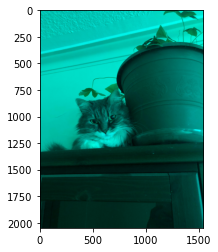

In [69]:
from PIL import Image

img = Image.new( 'RGB', (output_image.width, output_image.height), "black") # create a new black image
pixels = img.load() # create the pixel map

for x in range(output_image.width): #for every row
    for y in range(output_image.height): #for every column
        old_pixel = output_image.getpixel((x,y))   
        new_pixel = (0, old_pixel[1] ,old_pixel[2]) #keep the second and third values as original from image    
        pixels[x,y] = new_pixel  #update the new picture :) 

plt.imshow(img)

## Exercise: Threshold the Image into Black and White Regions

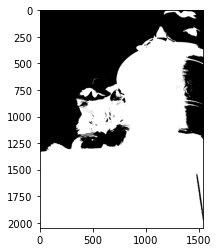

In [76]:
from PIL import Image

img = Image.new( 'RGB', (output_image.width, output_image.height), "black") # create a new black image
pixels = img.load() # create the pixel map

threshold = 150 #cut off pixel values below this value intensity and set them to black

for x in range(output_image.width): #for every row
    for y in range(output_image.height): #for every column
        old_pixel = output_image.getpixel((x,y))
        if old_pixel[0] > threshold or old_pixel[1] > threshold or old_pixel[2] > threshold:
            new_pixel = (0,0,0)
        else:
            new_pixel = (255,255,255)
        #new_pixel = (0, old_pixel[1] ,old_pixel[2]) #keep the second and third values as original from image    
        pixels[x,y] = new_pixel  #update the new picture :) 

plt.imshow(img)

## Exercise: Blurring an Image by using Gaussian Blur

In [118]:
#make a copy of im, will play around with this image
output_image = im

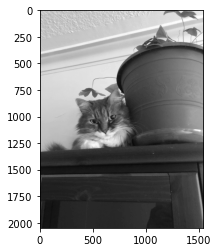

In [119]:
#first, we will convert image to gray-scale to simplify the process
from PIL import Image, ImageOps

# applying grayscale method
gray_image = ImageOps.grayscale(output_image)
plt.imshow(gray_image, cmap="gray")

Let's try something. Let's go to every pixel in the image a rewrite the grayscale of that pixel as the weighted average of its neighbors:

pixel=18(4pixel+pixelnorth+pixelsouth+pixelwest+pixeleast)

In [120]:
def blur(image):
    
    pixels = image.load()
    
    for x in range(image.width - 1):
        for y in range(image.height - 1):
            # = (4*pixels[x,y]/8 + pixels[x-1,y]/8  + pixels[x+1,y]/8 + pixels[x,y-1]/8 + pixels[x,y+1]/8)
            value = (int(4*pixels[x,y]/8 + pixels[x-1,y]/8  + pixels[x+1,y]/8 + pixels[x,y-1]/8 + pixels[x,y+1]/8))
            pixels[x,y] = (value)
    #return image

In [121]:
blur(gray_image)
blur(gray_image)
blur(gray_image)

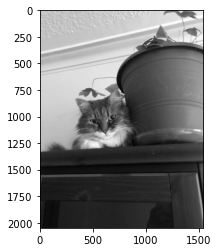

In [122]:
plt.imshow(gray_image, cmap="gray")